In [5]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
import librosa

# Use processor instead of tokenizer for audio
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Load your audio
audio_path = "audio/pi.mp3"
audio, sr = librosa.load(audio_path, sr=16000)

# Process audio with processor (not tokenizer)
inputs = processor(audio, sampling_rate=16000, return_tensors="pt")

# Get predictions
with torch.no_grad():
    logits = model(**inputs).logits
    predicted_ids = torch.argmax(logits, dim=-1)

# Decode to text
transcription = processor.decode(predicted_ids[0])
print("Transcription:", transcription)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?


Transcription: HETHERON I RYGYOUNG AND THIS IS THE THE MOST TACING YEAR FOR PARTI INMENTATION TO TIMES OUR SYSTEM IS RESPONSIBLE FOR PERRLYBE CHECKING THE THIS LEVIL OR BABY AND OLORTIN TE CHARITY WERE COLORTING THE PERSONAL ANGES BEAR WILES COMMEATION INGAVOF ANYDANGEN A SO BERATUALLY ASTRATLERYLY CAVOLITION OF THIS LEVIL INSTEAD BE USED TO SLICHES THIS IS GONLY REPLACE BY ACTUAL N FOR IT ON AND AND ANOOL ANOLO IMPORT E IN THE P I FIE A SO WE HAVE TOST ME JUST HERE A AR OUT O COMPONDS TAR AED AND BAZZAR AND WE ALSO HAVE ANOTHER SAGE JUST FOR THIS IS JUST WOKING ELEQICALY TO STOGBLE BETWEEN SOUND AND SILENT MOD AND TUS TALK ABOUT THE RALL OF TIMOR IN OUR P I WE HAVE TWO TIMES FOR THIS PEI ONE FOR PELYLY CHECKING BY CAKING I MEAN CHAKING THE IMPLS A O OUR SWICHES CHAKING THERE ER THIS LEVEL AND ANOTHER HIMOL IS FO ADJUSTING THE FREQONCY OR HARPE COMPONDS EITHER  LED OR BOT OTHE LETSERIN IN ACTION CANRONTLY THENYE NOL IS SAID TO ZEAO AND WE ARE IN A SONE MD LET SEE WHAT HAPPEN SPENDE DIN

Audio files saved: am_tone.wav, fm_tone.wav
Saved: am_analysis.png
Saved: fm_analysis.png
Processing complete.


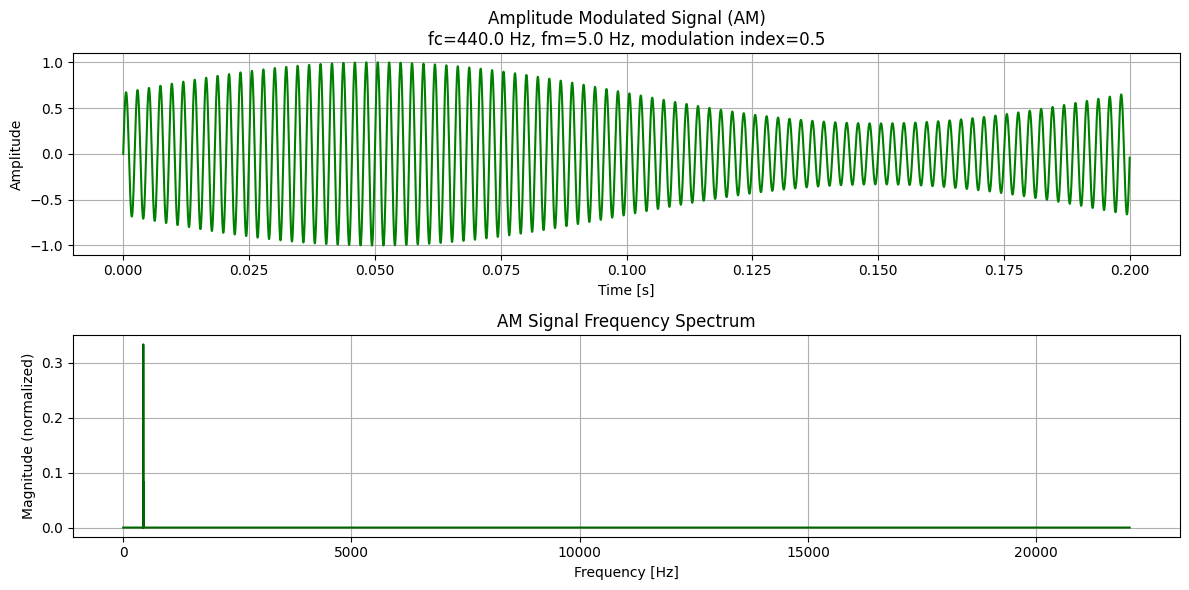

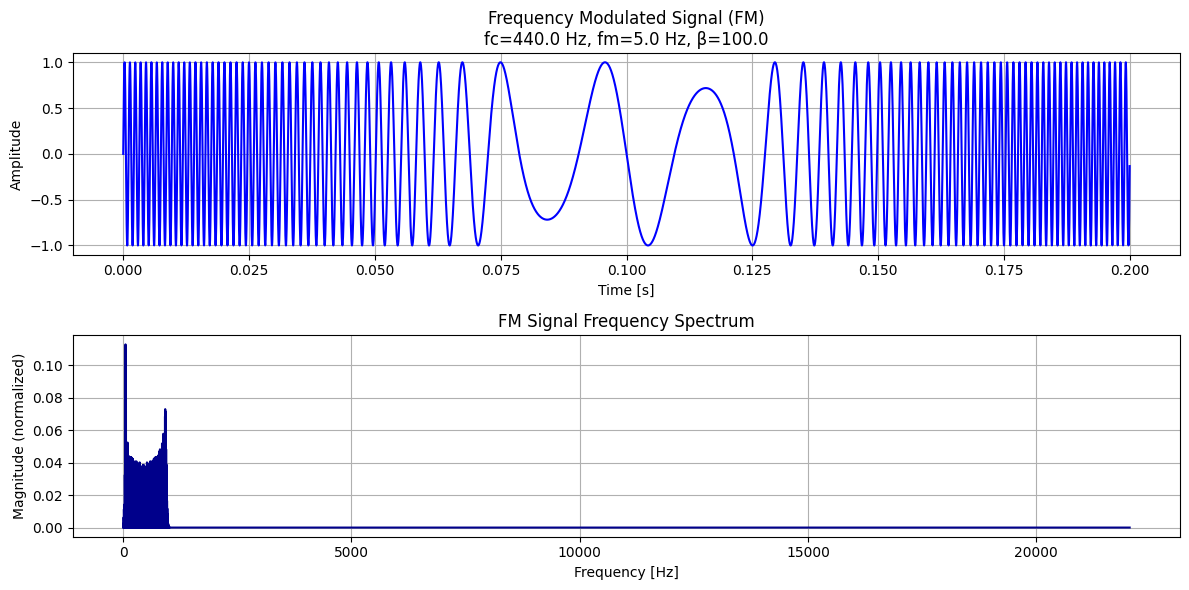

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import sounddevice as sd

# ===============================================================
# PARAMETERS
# ===============================================================
fs = 44100          # Sampling frequency (Hz)
duration = 5.0      # Duration of signals (seconds)
fc = 440.0          # Carrier frequency (Hz)
fm = 5.0            # Modulating tone frequency (Hz)
mod_index_am = 0.5  # AM depth (0–1)
beta_fm = 100.0     # FM modulation index
fft_size = 8192

# ===============================================================
# TIME BASE
# ===============================================================
t = np.arange(0, duration, 1/fs)

# ===============================================================
# AM SIGNAL
# ===============================================================
mod_signal_am = np.sin(2 * np.pi * fm * t)
am_signal = (1 + mod_index_am * mod_signal_am) * np.sin(2 * np.pi * fc * t)
am_signal /= np.max(np.abs(am_signal))

# ===============================================================
# FM SIGNAL
# ===============================================================
mod_signal_fm = np.sin(2 * np.pi * fm * t)
fm_signal = np.sin(2 * np.pi * fc * t + beta_fm * mod_signal_fm)
fm_signal /= np.max(np.abs(fm_signal))

# ===============================================================
# SAVE AUDIO FILES
# ===============================================================
sf.write("am_tone.wav", am_signal, fs)
sf.write("fm_tone.wav", fm_signal, fs)
print("Audio files saved: am_tone.wav, fm_tone.wav")

# ===============================================================
# FFT (Frequency Spectrum)
# ===============================================================
def compute_fft(signal, fs):
    N = len(signal)
    freqs = np.fft.rfftfreq(N, 1/fs)
    spectrum = np.abs(np.fft.rfft(signal)) / N
    return freqs, spectrum

freqs_am, spec_am = compute_fft(am_signal, fs)
freqs_fm, spec_fm = compute_fft(fm_signal, fs)

# ===============================================================
# PLOTTING
# ===============================================================

# --- Time-domain segment for AM (Longer to show envelope clearly)
segment_length = int(fs * 0.2)  # 0.2 seconds
t_segment = t[:segment_length]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_segment, am_signal[:segment_length], color="green")
plt.title(f"Amplitude Modulated Signal (AM)\nfc={fc} Hz, fm={fm} Hz, modulation index={mod_index_am}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freqs_am, spec_am, color="darkgreen")
plt.title("AM Signal Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (normalized)")
plt.grid(True)
plt.tight_layout()
plt.savefig("am_analysis.png", dpi=300)
print("Saved: am_analysis.png")

# --- Time-domain segment for FM (Longer to show frequency variation)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_segment, fm_signal[:segment_length], color="blue")
plt.title(f"Frequency Modulated Signal (FM)\nfc={fc} Hz, fm={fm} Hz, β={beta_fm}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(freqs_fm, spec_fm, color="darkblue")
plt.title("FM Signal Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (normalized)")
plt.grid(True)
plt.tight_layout()
plt.savefig("fm_analysis.png", dpi=300)
print("Saved: fm_analysis.png")

# ===============================================================
# PLAYBACK CONTROL (OPTIONAL)
# ===============================================================
def play_audio(signal, label):
    print(f"Playing {label}...")
    sd.play(signal, fs)
    sd.wait()
    print(f"{label} playback finished.")

# Uncomment the following lines to listen:
# play_audio(am_signal, "AM tone")
# play_audio(fm_signal, "FM tone")

print("Processing complete.")